# Master M2 MVA 2021/2022 - Introduction to (deep) Probabilistic Graphical Models - Homework 1
http://helios.mi.parisdescartes.fr/~platouch/mva/homework1.html  
Kayané ROBACH, Célia DOCLOT

## Général

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def readfile(filepath) : 
  """
  Renvoie X, liste de points d'un plan, et y leur classe (0 ou 1) contenus dans
  un ficher de type "trainA" dans le document filepath (string)
  """
  f = open(filepath)
  X = []
  y = []
  for line in f.readlines() : 
    line = line.split()
    X.append([float(line[0]), float(line[1])])
    y.append(int(line[2][1]))
  return np.array(X),np.array(y)

def normal(x, mu, Sigma) : 
  """
  Renvoie la densité du vecteur Gaussien (mu, Sigma) en x
  x vecteur taille d
  mu vecteur taille d
  Sigma matrice taille dxd 

  output : float 
  """
  vect = np.transpose([x-mu])
  temp = np.dot(vect.T, np.linalg.inv(Sigma).dot(vect))[0][0]
  d = len(x)

  return np.exp(-1/2 * temp) /np.sqrt((2*np.pi)**d * np.linalg.det(Sigma))

In [ ]:
#On importe toutes les données 
X_train_A, y_train_A = readfile("sample_data/trainA")
X_train_B, y_train_B = readfile("sample_data/trainB")
X_train_C, y_train_C = readfile("sample_data/trainC")
X_test_A, y_test_A = readfile("sample_data/testA")
X_test_B, y_test_B = readfile("sample_data/testB")
X_test_C, y_test_C = readfile("sample_data/testC")
decathlon = pd.read_csv("sample_data/decathlon.csv", header=0)
decathlon = decathlon.drop(["rownames"], axis=1)
decathlon = decathlon.astype("float64")

FileNotFoundError: ignored

## 1- Linear Classification


### 1.1 Generative model (LDA) 

**a. Derive the form of the maximum likelihood estimator for this model.**

$$y \sim B(\pi)$$
$$x|y = i \sim \mathcal{N}(\mu_i, \Sigma)$$
$$l(x | \pi, \mu_l, \Sigma) = \sum_{l=1}^n log \: p(x_l|y=y_l, \mu_{y_l}, \Sigma)$$
$$= \sum_{l=1}^n - log(2 \pi) - \frac{1}{2} log(| \Sigma |) - \frac{(x_l - \mu_{y_l})^T \Sigma^{-1} (x_l - \mu_{y_l})}{2}$$

Let's find the MLE for the mean :

$$\nabla_{\mu_i} l(x | \pi, \mu_l, \Sigma) = - \underset{y_l = i}{\sum_{l=1}^n} \nabla_{\mu_i} \frac{(x_l - \mu_{y_l})^T \Sigma^{-1} (x_l - \mu_{y_l})}{2}$$

Using that $\nabla_{\mu_i} (x_l - \mu_{y_l})^T \Sigma^{-1} (x_l - \mu_{y_l}) = -2 \Sigma^{-1} (x_l - \mu_{y_l})$ for $\Sigma^{-1}$ symetric :

$$\nabla_{\mu_i} l(x | \pi, \mu_l, \Sigma) = - \underset{y_l = i}{\sum_{l=1}^n} \frac{-2 \Sigma^{-1}(x_l - \mu_i)}{2}$$
$$= \underset{y_l = i}{\sum_{l=1}^n} \Sigma^{-1}(x_l - \mu_i)$$

$$\nabla_{\mu_i} l(x | \pi, \mu_l, \Sigma) = 0 \iff \underset{y_l = i}{\sum_{l=1}^n} \Sigma^{-1}(x_l - \mu_i) = 0$$
$$\iff \underset{y_l = i}{\sum_{l=1}^n} x_l = \underset{y_l = i}{\sum_{l=1}^n}\mu_i \iff \underset{y_l = i}{\sum_{l=1}^n} x_l = n_i \mu_i$$
$$\iff \mu_i = \frac{1}{n_i} \underset{y_l = i}{\sum_{l=1}^n} x_l \iff \mu_i = \frac{1}{n_i} \sum_{l=1}^n \mathbb{1}_{\{y_l = i\}} \: x_l$$

Let's find the MLE for the covariance :

$$\nabla_{\Sigma} l(x | \pi, \mu_l, \Sigma) = \sum_{l=1}^n \nabla_{\Sigma} \left( - \frac{1}{2} log(| \Sigma |) \right) + \nabla_{\Sigma} \left( - \frac{1}{2} (x_l - \mu_{y_l})^T \Sigma^{-1} (x_l - \mu_{y_l}) \right)$$

Using that the gradient of the determinant is equal to the comatrix we have 
$\nabla_{\Sigma} log(|\Sigma|) = \frac{\nabla_{\Sigma} |\Sigma|}{|\Sigma|} = \frac{com \: \Sigma}{|\Sigma|} = \frac{com \: \Sigma^T}{|\Sigma|} = \Sigma^{-1}$. Also we use that $\nabla_X a^T X^{-1} b = - X^{-1} a b^T X^{-1}$ and we get :

$$\nabla_{\Sigma} l(x | \pi, \mu_l, \Sigma) = \sum_{l=1}^n - \frac{1}{2} \Sigma^{-1} + \frac{1}{2} \Sigma^{-1} (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T \Sigma^{-1}$$

$$= - \frac{n}{2} \Sigma^{-1} + \frac{1}{2} \Sigma^{-1} \sum_{l=1}^n \left( (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T \right) \Sigma^{-1}$$

$$\nabla_{\Sigma} l(x | \pi, \mu_l, \Sigma) = 0 \iff - \frac{n}{2} \Sigma^{-1} + \frac{1}{2} \Sigma^{-1} \sum_{l=1}^n \left( (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T \right) \Sigma^{-1} = 0$$

$$\iff - \frac{n}{2} + \frac{1}{2} \Sigma^{-1} \sum_{l=1}^n (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T = 0$$

$$\iff - \frac{n}{2} \Sigma + \frac{1}{2} \sum_{l=1}^n (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T = 0$$

(Multiplying $\Sigma$ on the right and then on the left).

$$\iff \frac{1}{2} \sum_{l=1}^n (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T = \frac{n}{2} \Sigma$$

$$\iff \Sigma = \frac{1}{n} \sum_{l=1}^n (x_l - \mu_{y_l}) (x_l - \mu_{y_l})^T$$

**b. What is the form of the conditional distribution p(y = 1|x)? Compare with the form of logistic regression.**

$$p(y=1|x, \pi, \mu, \Sigma) = \frac{p(x|y=1, \mu, \Sigma) p(y=1| \pi)}{p(x|\pi, \mu, \Sigma)}$$

$$= \frac{p(x|y=1, \mu, \Sigma) p(y=1| \pi)}{\sum_i p(x|y, \mu_i, \Sigma) p(y=i| \pi)}$$

Let us denote $\pi_1 = p(y=1| \pi)$ and $\pi_0 = 1 - p(y=1| \pi) = p(y=0| \pi)$

$$= \frac{ (2 \pi)^{-1} |\Sigma|^{- \frac{1}{2}} \exp^{ -\frac{1}{2} (x-\mu_1)^T \Sigma^{-1} (x - \mu_1) } \times \pi_1 }{\sum_i (2 \pi)^{-1} |\Sigma|^{- \frac{1}{2}} \exp^{ -\frac{1}{2} (x-\mu_i)^T \Sigma^{-1} (x - \mu_i) } \times \pi_i}$$

$$= \frac{ (2 \pi)^{-1} |\Sigma|^{- \frac{1}{2}} \exp^{ -\frac{1}{2} (x-\mu_1)^T \Sigma^{-1} (x - \mu_1) } \times \pi_1 }{(2 \pi)^{-1} |\Sigma|^{- \frac{1}{2}} \sum_i \exp^{ -\frac{1}{2} (x-\mu_i)^T \Sigma^{-1} (x - \mu_i) } \times \pi_i}$$

$$= \frac{\exp^{ -\frac{1}{2} (x-\mu_1)^T \Sigma^{-1} (x - \mu_1) + log(\pi_1)}}{\sum_i \exp^{ -\frac{1}{2} (x-\mu_i)^T \Sigma^{-1} (x - \mu_i) + log(\pi_i)}}$$

$$= \frac{\exp^{ -\frac{1}{2} x^T \Sigma^{-1} x + \mu_1^T \Sigma^{-1} x -\frac{1}{2} \mu_1^T \Sigma^{-1} \mu_1  + log(\pi_1)}}{\sum_i \exp^{ -\frac{1}{2} x^T \Sigma^{-1} x + \mu_i^T \Sigma^{-1} x -\frac{1}{2} \mu_i^T \Sigma^{-1} \mu_i + log(\pi_i)}}$$

$$= \frac{\exp^{ -\frac{1}{2} x^T \Sigma^{-1} x} \exp^{ \mu_1^T \Sigma^{-1} x -\frac{1}{2} \mu_1^T \Sigma^{-1} \mu_1  + log(\pi_1)}}{\exp^{ -\frac{1}{2} x^T \Sigma^{-1} x} \sum_i \exp^{\mu_i^T \Sigma^{-1} x -\frac{1}{2} \mu_i^T \Sigma^{-1} \mu_i + log(\pi_i)}}$$

$$= \frac{\exp^{ \mu_1^T \Sigma^{-1} x -\frac{1}{2} \mu_1^T \Sigma^{-1} \mu_1  + log(\pi_1)}}{\sum_i \exp^{\mu_i^T \Sigma^{-1} x -\frac{1}{2} \mu_i^T \Sigma^{-1} \mu_i + log(\pi_i)}}$$

Let us denote $\mu_i^T \Sigma^{-1} = \beta_i$ and $-\frac{1}{2} \mu_i^T \Sigma^{-1} \mu_i + log(\pi_i) = \alpha_i$ so that we get :

$$= \frac{\exp^{ \beta_1 x + \alpha_1}}{\sum_i \exp^{\beta_i x + \alpha_i}}$$

$$= \frac{\exp^{ \beta_1 x + \alpha_1}}{\exp^{ \beta_1 x + \alpha_1} + \exp^{\beta_0 x + \alpha_0}}$$

$$= \frac{1}{1 + \exp^{(\beta_0-\beta_1) x + \alpha_0 - \alpha_1} }$$  

On retrouve bien la régression logistique de $(\beta_1-\beta_0) x + \alpha_1 - \alpha_0$.

**c. Implement the MLE for this model and apply it to the data. Represent graphically the data as a point cloud in R2 and the line defined by the equation $p(y=1|x) = 0.5$**

In [ ]:
def MLE_LDA(X, y): 
  
  #For the mean 
  mu_0, mu_1 = np.zeros(2), np.zeros(2)
  n, n_1 = len(y), sum(y)
  for (i,x) in enumerate(X) : 
    if y[i] == 0 : 
      mu_0 += x 
    else : 
      mu_1 += x 
  mu_0 /= n-n_1
  mu_1 /= n_1

  #For the covariance
  Sigma = np.zeros((2,2))
  for (i,x) in enumerate(X) : 
    if y[i] == 0 : 
      Sigma += np.transpose([x - mu_0]).dot([x- mu_0])
    else : 
      Sigma += np.transpose([x - mu_1]).dot([x- mu_1])
  Sigma /= n 

  return mu_0, mu_1, Sigma

Avec la question b) on obtient : $$p(y=1|x) = 0.5 \Leftrightarrow \frac{1}{1 + \exp((\beta_0-\beta_1) x + \alpha_0 - \alpha_1)} = \frac{1}{2}$$
$$\Leftrightarrow (\beta_0-\beta_1) x + \alpha_0 - \alpha_1 = 0$$
$$\Leftrightarrow  x_2 = \frac{\alpha_1 - \alpha_0}{B_2} - \frac{B_1}{B_2} x_1$$
Avec $x_1, x_2$ les coordonnées de $x$ et $B_1, B_2$ celles de $\beta_0 - \beta_1$. On peut donc aisément tracer la droite qui sépare les deux régions.

In [ ]:
def plot_LDA(X_train, y_train, X_test, y_test) :

  plt.figure(figsize=(12,8))

  mu_0, mu_1, Sigma = MLE_LDA(X_train, y_train)
  Sigma_inv = np.linalg.inv(Sigma)
  pi = sum(y_train)/len(y_train)

  #Nuages de points
  X_0 = np.transpose(X_test[np.where(y_test==0)[0]])
  X_1 = np.transpose(X_test[np.where(y_test==1)[0]])
  plt.scatter(X_0[0], X_0[1], label = "y = 0")
  plt.scatter(X_1[0], X_1[1], label = "y = 1")
  
  #Ligne d'équation p(y = 1|x) = 0,5
  beta = mu_0.dot(Sigma_inv) - mu_1.dot(Sigma_inv) #beta_0 - beta_1
  alpha = -1/2 * (np.dot(mu_0.dot(Sigma_inv), np.transpose([mu_0]))) + np.log(1-pi) #alpha_0
  alpha += 1/2 * (np.dot(mu_1.dot(Sigma_inv), np.transpose([mu_1]))) - np.log(pi) # - alpha_1

  X_bis = [min(X_0[0]), max(X_0[0])]
  Y_bis = [-alpha/beta[1] - beta[0]/beta[1] * x for x in X_bis]

  plt.plot(X_bis,Y_bis, 'r--')
  
  plt.title("Nuages de points (données du test) avec la frontière trouvée avec LDA (sur les données d'entraînement)")
  plt.legend()
  plt.show()

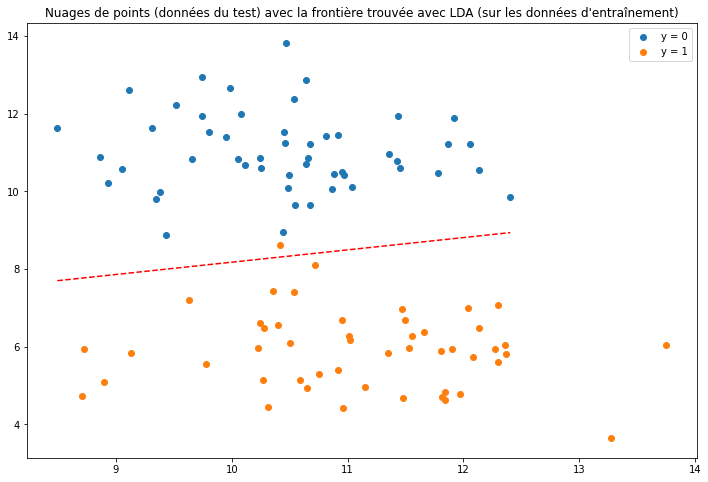

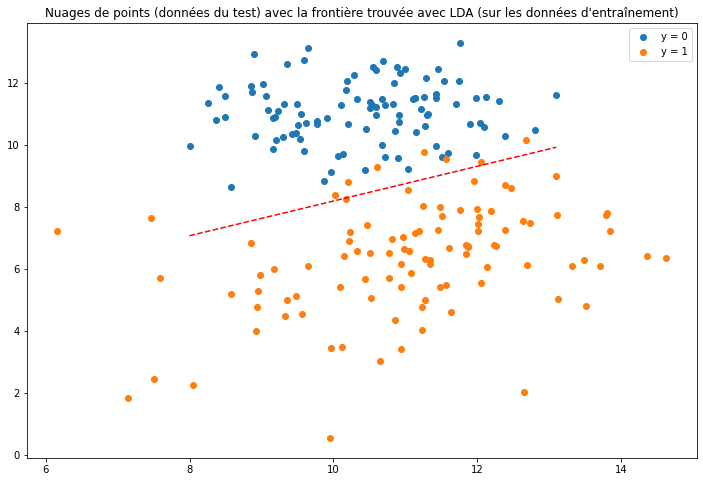

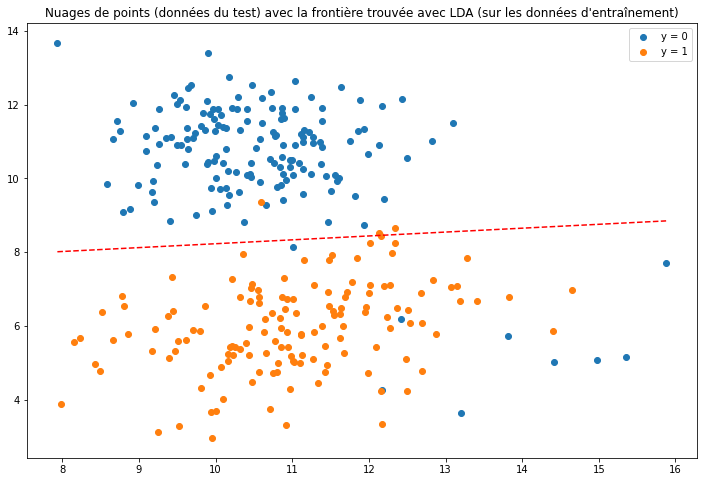

In [ ]:
# Application sur nos données 
plot_LDA(X_train_A, y_train_A, X_test_A, y_test_A)
plot_LDA(X_train_B, y_train_B, X_test_B, y_test_B)
plot_LDA(X_train_C, y_train_C, X_test_C, y_test_C)

### 1.2 Logistic regression

**a. Give the numerical values of the parameters learnt.**

$$f(x) = w^Tx+b$$ 

$$y_i | x_i,w,b \sim B(g(w^Tx_i+b)) \: \forall i$$

Where $g(t) = \frac{1}{1 + \exp^{-t}}$ is the logistic regression, $g^{'}(t) = \frac{\exp^{-t}}{(1 + \exp^{-t})^2}$.

We build the cross entropy error function which is the opposit of the log-likelihood of the cross logistic regression :

$$Loss_{y_i}(t) = = - \sum_i y_i \: log(\frac{1}{1 + \exp^{-t}}) + (1 - y_i) \: log(\frac{\exp^{-t}}{1 + \exp^{-t}})$$

$$\frac{\partial Loss}{\partial t} = y_i - g(t)$$

$$\frac{\partial^2 Loss}{\partial t^2} = - g^{'}(t)$$

In our case we focus on :

$$Loss_{(x_i, y_i)_i}(w, b) = - \sum_i y_i \: log(\frac{1}{1 + \exp^{-(w^Tx_i+b)}}) + (1 - y_i) \: log(\frac{\exp^{-(w^Tx_i+b)}}{1 + \exp^{-(w^Tx_i+b)}})$$
$$= - \sum_i y_i \: log(\frac{1}{1 + \exp^{-(w^Tx_i+b)}}) + (1 - y_i) \: log(1 - \frac{1}{1 + \exp^{-(w^Tx_i+b)}})$$

In [ ]:
def IRLS(x, y, N=50, tolerance=10**(-10)):

  def logit(t):
    return 1. / (1 + np.exp(-t)) 

  def derivative_logit(t):
    return np.exp(-t)/(1 + np.exp(-t))**2

  def derivative_cost(t, y):
    return y - logit(t)

  def second_derivative_cost(t, y):
    return - derivative_logit(t)

  def gradient_b(x, y, w, b):
    return derivative_cost( w.dot(x.transpose()) + b, y )

  def gradient_w(i, x, y, w, b):
    return x[:,i] * derivative_cost( w.dot(x.transpose()) + b, y )

  def gradient_2_w_b(i, x, y, w, b):
    return x[:,i] * second_derivative_cost( w.dot(x.transpose()) + b, y )

  def gradient_2_w(i, j, x, y, w, b):
    return x[:,i] * x[:,j] * second_derivative_cost( w.dot(x.transpose()) + b, y )

  def gradient_2_b(x, y, w, b):
    return second_derivative_cost( w.dot(x.transpose()) + b, y )

  def hessian(x, y, w, b):
    return np.array([[gradient_2_b(x, y, w, b), gradient_2_w_b(0, x, y, w, b), gradient_2_w_b(1, x, y, w, b)],[gradient_2_w_b(0, x, y, w, b), gradient_2_w(0, 0, x, y, w, b), gradient_2_w(0, 1, x, y, w, b)],[gradient_2_w_b(1, x, y, w, b), gradient_2_w(0, 1, x, y, w, b), gradient_2_w(1, 1, x, y, w, b)]])

  theta = np.array([0,0,0])
  b = theta[0]
  w1 = theta[1]
  w2 = theta[2]
  w = np.array([w1,w2])

  _gradient_b = - np.sum( gradient_b(x, y, w, b) )
  _gradient_w1 = - np.sum( gradient_w(0, x, y, w, b) )
  _gradient_w2 = - np.sum( gradient_w(1, x, y, w, b) )
  gradient_theta = np.array([_gradient_b, _gradient_w1, _gradient_w2])

  _hessian = - np.sum( hessian(x, y, w, b), axis=2)

  n = 0

  while np.linalg.norm(gradient_theta) > tolerance and n < N:

    theta = theta - np.linalg.inv(_hessian).dot(gradient_theta.transpose())

    b = theta[0]
    w1 = theta[1]
    w2 = theta[2]
    w = np.array([w1,w2])

    _gradient_b = - np.sum( gradient_b(x, y, w, b) )
    _gradient_w1 = - np.sum( gradient_w(0, x, y, w, b) )
    _gradient_w2 = - np.sum( gradient_w(1, x, y, w, b) )
    _hessian = - np.sum( hessian(x, y, w, b), axis=2)
    gradient_theta = np.array([_gradient_b, _gradient_w1, _gradient_w2])

    n += 1

  if n==N:
    print(f"Max number of iterations {N}")
  
  return b,w

print(f"\nParameters learnt for the dataset A : b = {IRLS(X_train_A, y_train_A)[0]}, w = {IRLS(X_train_A, y_train_A)[1]}") 
print(f"\nParameters learnt for the dataset B : b = {IRLS(X_train_B, y_train_B)[0]}, w = {IRLS(X_train_B, y_train_B)[1]}") 
print(f"\nParameters learnt for the dataset C : b = {IRLS(X_train_C, y_train_C)[0]}, w = {IRLS(X_train_C, y_train_C)[1]}") 


Parameters learnt for the dataset A : b = 208.3027740793894, w = [  9.23546016 -35.9346541 ]

Parameters learnt for the dataset B : b = 13.43016213786943, w = [ 1.84239524 -3.71393779]

Parameters learnt for the dataset C : b = 18.80703913398177, w = [-0.27693433 -1.91419825]


**b. Represent graphically the data as a cloud point in R2 as well as the line defined by the equation**

$$p(y=1|x) = 0.5 \Leftrightarrow g(f(x)) = 0.5 \Leftrightarrow w^Tx+b = 0$$
$$\Leftrightarrow w_1 x_1 + w_2 x_2 + b = 0$$
$$\Leftrightarrow x_2 = \frac{- b - w_1 x_1}{w_2}$$

Avec ($x_1, x_2$) les coordonnées de chaque point $x$ et ($w_1, w_2$) celles de $w$.

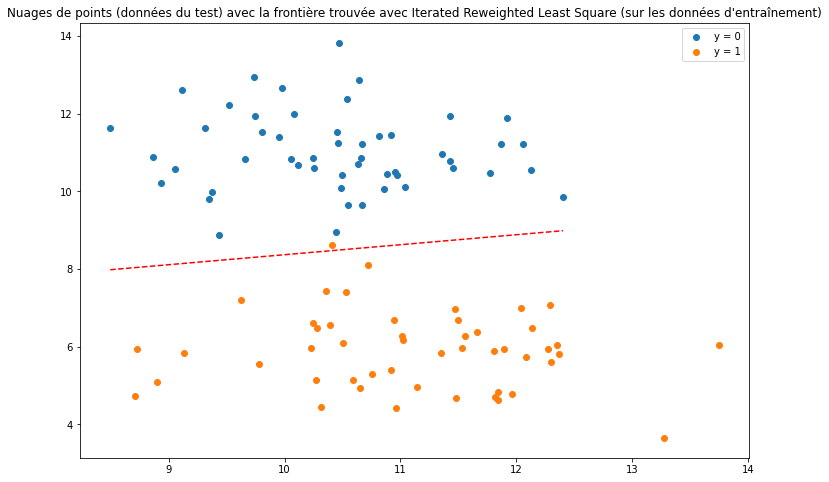

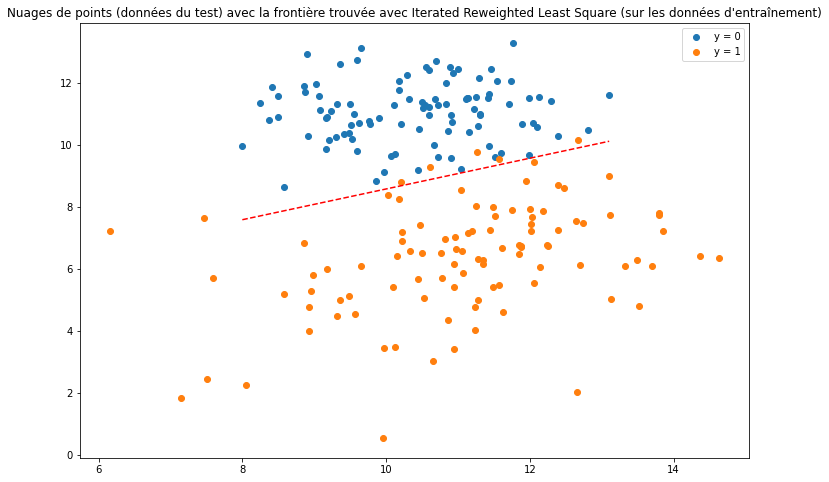

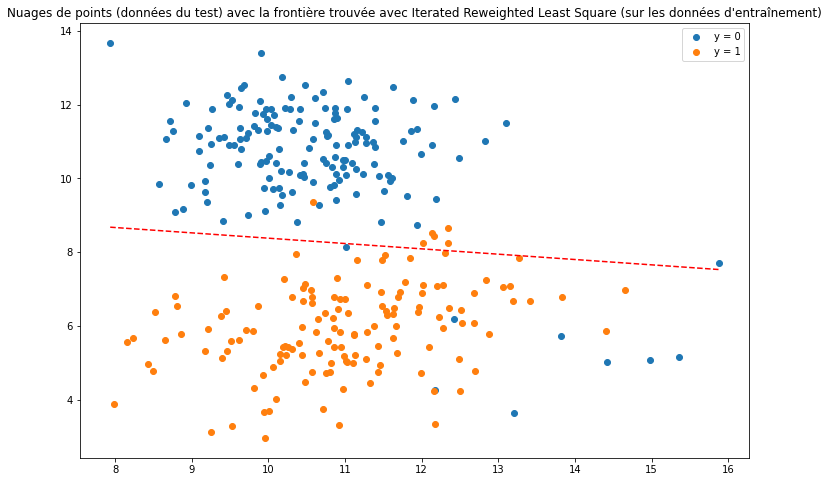

In [ ]:
def plot_IRLS(X_train, y_train, X_test, y_test) :

  plt.figure(figsize=(12,8))

  #Nuages de points
  X_0 = np.transpose(X_test[np.where(y_test==0)[0]])
  X_1 = np.transpose(X_test[np.where(y_test==1)[0]])
  plt.scatter(X_0[0], X_0[1], label = "y = 0")
  plt.scatter(X_1[0], X_1[1], label = "y = 1")
  
  #Ligne d'équation p(y = 1|x) = 0,5
  b, w = IRLS(X_train, y_train)
  X_bis = [min(X_0[0]), max(X_0[0])]
  Y_bis = [(- b - x*w[0])/w[1] for x in X_bis]

  plt.plot(X_bis,Y_bis, 'r--')

  plt.title("Nuages de points (données du test) avec la frontière trouvée avec Iterated Reweighted Least Square (sur les données d'entraînement)")
  plt.legend()
  plt.show()

plot_IRLS(X_train_A, y_train_A, X_test_A, y_test_A)
plot_IRLS(X_train_B, y_train_B, X_test_B, y_test_B)
plot_IRLS(X_train_C, y_train_C, X_test_C, y_test_C)

### 1.3 Linear regression

**a. Provide the numerical values of the learnt parameters.**

Résoudre une regression linéaire en minimisant les moindres carrés revient à résoudre l'équation normale et trouver $\theta$ tel que $\theta = (X^TX)^{-1}X^TY$ où $Y = w^Tx + b$. Nous posons ici $Y = W^T X$ avec X incluant la constante, dans ce cas le coefficient de $W$ correspondant est b. Autremet dit on ajoute une colonne de 1 à $X$ pour prendre en compte b.

In [ ]:
def normal_equation(X, y):
  X_bis = np.insert(X, [0], 1, axis = 1)
  theta = np.linalg.inv((X_bis.T).dot(X_bis)).dot((X_bis.T).dot(y))
  return theta[1:], theta[0]

w,b = normal_equation(X_train_A, y_train_A)
print(f"\nParameters learnt for the dataset A : b = {b}, w = {w}")
w,b = normal_equation(X_train_B, y_train_B)
print(f"\nParameters learnt for the dataset B : b = {b}, w = {w}")
w,b = normal_equation(X_train_C, y_train_C)
print(f"\nParameters learnt for the dataset C : b = {b}, w = {w}")


Parameters learnt for the dataset A : b = 1.3834577395037029, w = [ 0.05582438 -0.17636636]

Parameters learnt for the dataset B : b = 0.8824998417113046, w = [ 0.08258172 -0.14757517]

Parameters learnt for the dataset C : b = 1.6401520597429782, w = [ 0.01675461 -0.15897174]


**b. Represent graphically the data as a point cloud in R2 as well as the line defined by the equation**

On retrouve une réponse similaire à précédemment.

$$p(y=1|x) = 0.5 \Leftrightarrow f(x) = 0.5 \Leftrightarrow w^Tx+b = 0.5$$
$$\Leftrightarrow w_1 x_1 + w_2 x_2 + b = 0.5$$
$$\Leftrightarrow x_2 = \frac{0.5- b - w_1 x_1}{w_2}$$

Comme avant, ($x_1, x_2$) sont les coordonnées de chaque point $x$ et ($w_1, w_2$) celles de $w$.

Néanmoins, ici notre variable dépendante ($Y$) est binaire tandis qu'une régression linéaire est plus adaptée pour des variables continues. L'inconvénient dans notre cas est que nous allons prédire des valeurs dans $[0,1]$ pour $Y$.

In [ ]:
def plot_LinReg(X_train, y_train, X_test, y_test) :

  plt.figure(figsize=(12,8)) 

  #Nuages de points
  X_0 = np.transpose(X_test[np.where(y_test==0)[0]])
  X_1 = np.transpose(X_test[np.where(y_test==1)[0]])
  plt.scatter(X_0[0], X_0[1], label = "y = 0")
  plt.scatter(X_1[0], X_1[1], label = "y = 1")

  #Ligne d'équation p(y = 1|x) = 0,5
  w,b = normal_equation(X_train,y_train)
  X_bis = [min(X_0[0]), max(X_0[0])]
  Y_bis = [(0.5-b)/w[1] - w[0]/w[1] * x for x in X_bis]

  plt.plot(X_bis,Y_bis, 'r--')

  plt.title("Nuages de points (données du test) avec la frontière trouvée par régression linéaire (sur les données d'entraînement)")
  plt.legend()
  plt.show()

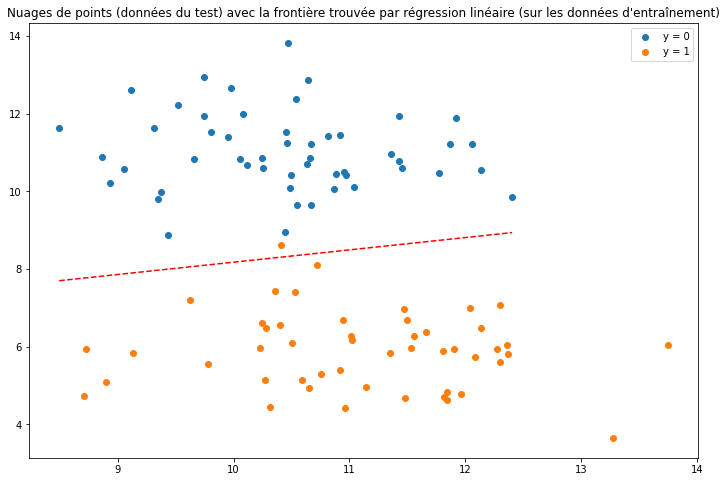

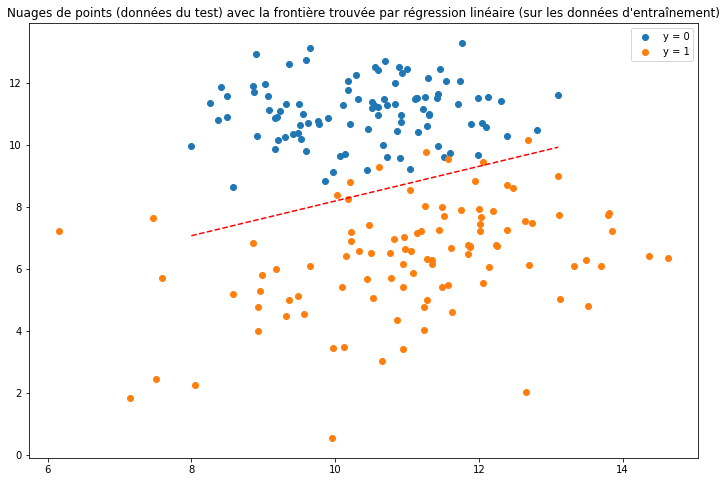

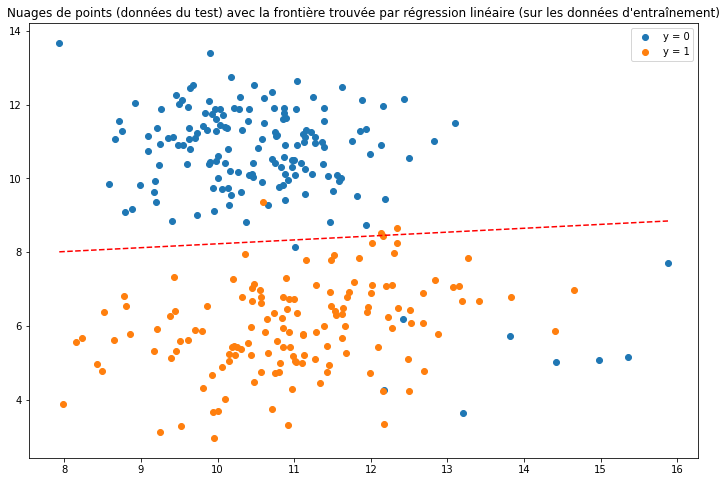

In [ ]:
plot_LinReg(X_train_A, y_train_A, X_test_A, y_test_A)
plot_LinReg(X_train_B, y_train_B, X_test_B, y_test_B)
plot_LinReg(X_train_C, y_train_C, X_test_C, y_test_C)

### 1.4 Application

**a. Compute for each model the misclassification error (i.e. the fraction of the data misclassified) on the training data and compute it as well on the test data.**

In [ ]:
def missclassification_LDA(X_train, y_train, X_test, y_test) :

  mu_0, mu_1, Sigma = MLE_LDA(X_train, y_train)
  Sigma_inv = np.linalg.inv(Sigma)
  pi = sum(y_train)/len(y_train)

  #On calcule p(y=1|x) pour classifier avec les données entraînées 
  beta = mu_0.dot(Sigma_inv) - mu_1.dot(Sigma_inv) #beta_0 - beta_1
  alpha = -1/2 * (np.dot(mu_0.dot(Sigma_inv), np.transpose([mu_0]))) + np.log(1-pi) #alpha_0
  alpha += 1/2 * (np.dot(mu_1.dot(Sigma_inv), np.transpose([mu_1]))) - np.log(pi) # - alpha_1

  #Prédictions sur les données d'entrainement et de test
  y_train_pred = []
  y_test_pred = []

  for x in X_train : 
    p = 1/(1+ np.exp(beta.dot(x) + alpha))
    if p>0.5: 
      y_train_pred.append(1)
    else :
      y_train_pred.append(0)
  missclassification_train = np.sum(np.array(y_train_pred)!=y_train) / len(y_train)

  for x in X_test : 
    p = 1/(1+ np.exp(beta.dot(x) + alpha))
    if p>0.5: 
      y_test_pred.append(1)
    else :
      y_test_pred.append(0)
  missclassification_test = np.sum(np.array(y_test_pred)!=y_test) / len(y_test)

  return missclassification_train, missclassification_test

print(f"\nMissclassification error on dataset A :\ntrain : {missclassification_LDA(X_train_A, y_train_A, X_test_A, y_test_A)[0]*100}%,\ntest : {missclassification_LDA(X_train_A, y_train_A, X_test_A, y_test_A)[1]*100}%")
print(f"\nMissclassification error on dataset B :\ntrain : {missclassification_LDA(X_train_B, y_train_B, X_test_B, y_test_B)[0]*100}%,\ntest : {missclassification_LDA(X_train_B, y_train_B, X_test_B, y_test_B)[1]*100}%")
print(f"\nMissclassification error on dataset C :\ntrain : {missclassification_LDA(X_train_C, y_train_C, X_test_C, y_test_C)[0]*100}%,\ntest : {missclassification_LDA(X_train_C, y_train_C, X_test_C, y_test_C)[1]*100}%")


Missclassification error on dataset A :
train : 0.0%,
test : 1.0%

Missclassification error on dataset B :
train : 2.0%,
test : 4.5%

Missclassification error on dataset C :
train : 2.666666666666667%,
test : 4.0%


In [ ]:
def missclassification_LogReg(X_train, y_train, X_test, y_test) : 

  b, w = IRLS(X_train, y_train)
  w1 = w[0]
  w2 = w[1]

  #Prédictions sur les données d'entrainement et de test
  y_train_pred = []
  y_test_pred = []

  p = np.dot(w,X_train.T) + b

  for i in range(X_train.shape[0]):
    if p[i] > 0.5:
      y_train_pred.append(1)
    else:
      y_train_pred.append(0)
  missclassification_train = np.sum(np.array(y_train_pred)!=y_train) / len(y_train)

  p = np.dot(w,X_test.T) + b

  for i in range(X_test.shape[0]):
    if p[i] > 0.5:
      y_test_pred.append(1)
    else:
      y_test_pred.append(0)
  missclassification_test = np.sum(np.array(y_test_pred)!=y_test) / len(y_test)

  return missclassification_train, missclassification_test

print(f"\nMissclassification error on dataset A :\ntrain : {missclassification_LogReg(X_train_A, y_train_A, X_test_A, y_test_A)[0]*100}%,\ntest : {missclassification_LogReg(X_train_A, y_train_A, X_test_A, y_test_A)[1]*100}%")
print(f"\nMissclassification error on dataset B :\ntrain : {missclassification_LogReg(X_train_B, y_train_B, X_test_B, y_test_B)[0]*100}%,\ntest : {missclassification_LogReg(X_train_B, y_train_B, X_test_B, y_test_B)[1]*100}%")
print(f"\nMissclassification error on dataset C :\ntrain : {missclassification_LogReg(X_train_C, y_train_C, X_test_C, y_test_C)[0]*100}%,\ntest : {missclassification_LogReg(X_train_C, y_train_C, X_test_C, y_test_C)[1]*100}%")


Missclassification error on dataset A :
train : 0.0%,
test : 1.0%

Missclassification error on dataset B :
train : 2.0%,
test : 3.5000000000000004%

Missclassification error on dataset C :
train : 4.666666666666667%,
test : 5.333333333333334%


In [ ]:
def missclassification_LinReg(X_train, y_train, X_test, y_test) : 

  w,b = normal_equation(X_train, y_train)

  #Prédictions sur les données d'entrainement et de test
  y_train_pred = []
  y_test_pred = []

  p = np.dot(w,X_train.T) + b

  for i in range(X_train.shape[0]):
    if p[i] > 0.5:
      y_train_pred.append(1)
    else:
      y_train_pred.append(0)
  missclassification_train = np.sum(np.array(y_train_pred)!=y_train) / len(y_train)

  p = np.dot(w,X_test.T) + b

  for i in range(X_test.shape[0]):
    if p[i] > 0.5:
      y_test_pred.append(1)
    else:
      y_test_pred.append(0)
  missclassification_test = np.sum(np.array(y_test_pred)!=y_test) / len(y_test)

  return missclassification_train, missclassification_test

print(f"\nMissclassification error on dataset A :\ntrain : {missclassification_LinReg(X_train_A, y_train_A, X_test_A, y_test_A)[0]*100}%,\ntest : {missclassification_LinReg(X_train_A, y_train_A, X_test_A, y_test_A)[1]*100}%")
print(f"\nMissclassification error on dataset B :\ntrain : {missclassification_LinReg(X_train_B, y_train_B, X_test_B, y_test_B)[0]*100}%,\ntest : {missclassification_LinReg(X_train_B, y_train_B, X_test_B, y_test_B)[1]*100}%")
print(f"\nMissclassification error on dataset C :\ntrain : {missclassification_LinReg(X_train_C, y_train_C, X_test_C, y_test_C)[0]*100}%,\ntest : {missclassification_LinReg(X_train_C, y_train_C, X_test_C, y_test_C)[1]*100}%")


Missclassification error on dataset A :
train : 0.0%,
test : 1.0%

Missclassification error on dataset B :
train : 2.0%,
test : 4.5%

Missclassification error on dataset C :
train : 2.666666666666667%,
test : 4.0%


**b. Compare the performances of the different methods on the three datasets. Is the misclassification error larger, smaller, or similar on the training and test data? Why? Which methods yield very similar/dissimilar results? Which methods yield the best results on the different datasets ? Provide an interpretation.**

The Linear Discriminant Analysis (LDA) which compute the Maximum Likelihood Estimators (MLEs) of our model give the same results -in terms of missclassification error on the three datasets- as the Linear Regression which compute the Ordinary Least Square estimators (OLS).

We could prove that under a gaussian data generating process (iid normal error terms) the MLE and the OLS are equal. Since then it is coherent to get the same results here.

The three methods have higher missclassification error for the third dataset. The logistic regression works better than other methods for the second dataset but it works less well for the third one. 

The hyperplane separating both classes ($Y=0$ and $Y=1$) on the dataset B is more clear than on the dataset C. Since the logistic regression is more adapted for the prediction of a probability (when $Y$ is a binary variable), it could be a reason why it works better on the dataset B (because both class are more clearly separated than on the dataset C).

## 2- Gaussian mixture models and EM


### 2.1 Math

On pose $Z_0 \sim \mathcal M (1, \pi)$, on a donc $Z_0 \in \{0,1\}^K$ et on peut alors écrire $X_0 | (Z_{0,k}=1) \sim \mathcal N(\mu_k,\Sigma_k)$.  
On note $\theta = (\mu_k, \Sigma_k)_{k = 1,...,K}$ pour simplifier les notations.

On a $z_i|x_i,\pi,\theta \sim \mathcal M (z_i; 1, \tau_i)$ avec $\tau_i \in \mathbb R^K$ et $\tau_{ik} = \frac{\pi_k \mathcal N (x_i; \mu_k, \Sigma_k)}{\sum_{l=1}^K \pi_l \mathcal N(x_i;\mu_l, \Sigma_l)}$.  (Voir **Preuve 1** en-dessous)

**Expectation Step :**  
Soit $R$ une mesure, on trouve : $\mathcal L( R((z_i)_i); \pi_t, \theta_t) \: \: + \: \: KL( \: R((z_i)_i) \: || \: p((z_i)_i|(x_i)_i,\pi_t,\theta_t) \:) = L_{(x_i)_i}(\pi_t, \theta_t)$.

$L_{(x_i)_i}(\pi_t, \theta_t)$ est constant par rapport à $R$ (voir **Preuve 2**).  
On cherche $R$ qui maximise $\mathcal L$. Puisque $\mathcal L$ et $KL$ se compensent, on prend donc la mesure qui minimise la divergence de Kullback-Leibler, c'est-à-dire qui l'annule : $R((z_i)_i) = p((z_i)_i|(x_i)_i,\pi_t,\theta_t) = \Pi_{i=1}^n p(z_i|x_i,\pi_t,\theta_t)$ qu'on connaît, qui est "tractable" (**Preuve 1 et 3**).

On a alors $L_{(x_i)_i}(\pi_t, \theta_t) = \mathcal L(R((z_i)_i); \pi_t, \theta_t)$. 

Pendant l'E-Step on calcule donc les $\tau_{ik}$ (défini au-dessus avec $\theta = \theta_t$) qui déterminent entièrement $R$ et qui nous permettent de passer au M-Step.

**Maximisation Step :**  
On cherche donc maintenant :  
$(\pi_{t+1}, \theta_{t+1}) \in \arg \max_{pi, \theta} L_{(x_i)_i}(\pi, \theta)$  
$ = \arg\max_{\pi, \theta}\mathcal L(p((z_i)_i|(x_i)_i,\pi_t,\theta_t)); \pi, \theta)$  
$=\arg\max_{\pi, \theta} \mathbb E_{z_i|x_i, \pi_t, \theta_t}[\log(\frac{p((z_i)_i,(x_i)_i|\pi,\theta)}{p((z_i)_i|(x_i)_i,\pi_t,\theta_t)})]$  
$=\arg\max_{\pi, \theta} \mathbb E_{z_i|x_i, \pi_t, \theta_t} [\log(p((z_i)_i,(x_i)_i|\pi,\theta)) - \log(p((z_i)_i|(x_i)_i,\pi_t,\theta_t)))]$  
Le terme de droite est constant par rapport à $\pi, \theta$ on peut donc simplifier :   
$=\arg\max_{\pi, \theta} \mathbb E_{z_i|x_i, \pi_t, \theta_t \sim \mathcal M(1, \tau_i)}[\log(\prod_{i=1}^np(x_i|z_i, \pi,\theta)p(z_i|\pi, \theta))]$  
$=\arg\max_{\pi, \theta} \mathbb E_{z_i|x_i, \pi_t, \theta_t \sim \mathcal M(1, \tau_i)}[\sum_{i=1}^n \log(p(x_i|z_i, \pi,\theta)p(z_i|\pi, \theta))]$  
$=\arg\max_{\pi, \theta} \mathbb E_{z_i|x_i, \pi_t, \theta_t \sim \mathcal M(1, \tau_i)}[\sum_{i=1}^n \log(\prod_{k=1}^K (\pi_k \mathcal N(x_i, \mu_k, \Sigma_k))^{z_{ik}}]$  
$=\arg\max_{\pi, \theta} \mathbb E_{z_i|x_i, \pi_t, \theta_t \sim \mathcal M(1, \tau_i)}[\sum_{i=1}^n \sum_{k=1}^K z_{ik}\log(\pi_k \mathcal N(x_i; \mathcal \mu_k, \Sigma_k))]$  
$=\arg\max_{\pi, \theta} \sum_{i=1}^n \sum_{k=1}^K \tau_{ik} \log(\pi_k \mathcal N(x_i; \mathcal \mu_k, \Sigma_k))$  

On trouve donc :  
$\pi_{k,t+1} = \frac{1}{n}\sum_{i=1}^n \tau_{ik}$  
$\mu_{k,t+1} = \frac{1}{n_k}\sum_{i=1}^n \tau_{ik}x_i $  
$\Sigma_{k,t+1} = \frac{1}{n_k}\sum_{i=1}^n \tau_{ik} (x_i - \mu_{k,t+1})(x_i - \mu_{k,t+1})^T$   
(Voir **Preuve 4**) On peut tout calculer grâce aux $\tau$ calculés pendant le E-Step.

On itère jusqu'à ce que $\mathcal L$ converge. A chaque étape la vraissemblance $L$ augmente jusqu'à atteindre son maximum.

**Preuve 1 :**  
On a $$p(z_i|x_i,\pi,\theta) = \frac{p(z_i, x_i|\pi, \theta)}{p(x_i|\pi, \theta)} $$ 

$$= \frac{p(z_i|\pi)p(x_i|z_i,\theta)}{p(x_i|\pi,\theta)} $$

$$= \frac{\Pi_{k=1}^K (\pi_k \mathcal N (x_i;\mu_k,\Sigma_k))^{z_{ik}}}{\sum_{l=1}^K \pi_l \mathcal N(x_i;\mu_l,\Sigma_l)}$$

$z_{ik} = 1$ si $x_i$ est dans le cluster $k$ donc $\sum_k z_{ik} = 1$.

$$= \frac{\Pi_{k=1}^K (\pi_k \mathcal N (x_i;\mu_k,\Sigma_k))^{z_{ik}}}{(\sum_{l=1}^K \pi_l \mathcal N(x_i;\mu_l,\Sigma_l))^{\sum_k z_{ik}}}$$

$$ = \frac{\Pi_{k=1}^K (\pi_k \mathcal N (x_i;\mu_k,\Sigma_k))^{z_{ik}}}{\Pi_{k=1}^K (\sum_{l=1}^K \pi_l \mathcal N(x_i;\mu_l,\Sigma_l))^{z_{ik}}}$$

$$= \Pi_{k=1}^K \tau_{ik}^{z_{ik}}$$

avec $\tau_{ik} = \frac{\pi_k \mathcal N (x_i; \mu_k, \Sigma_k)}{\sum_{l=1}^K \pi_l \mathcal N(x_i;\mu_l, \Sigma_l)}$. 

**Preuve 2 :**  
$$\mathcal L + KL = \sum_{(z_i)_i} R((z_i)_i) (\log(\frac{p((z_i)_i,(x_i)_i|\theta,\pi)}{R((z_i)_i)}) - \log(\frac{p((z_i)_i|(x_i)_i,\theta,\pi)}{R((z_i)_i)}))$$  
$$= \sum_{(z_i)_i} R((z_i)_i) \log(\frac{p((z_i)_i,(x_i)_i|\theta,\pi)}{p((z_i)_i|(x_i)_i,\theta,\pi)})$$ 
$$= \sum_{(z_i)_i} R((z_i)_i) \log(p((x_i)_i|\theta,\pi))$$
$$= \log(p((x_i)_i|\theta,\pi))$$
$$= L_{(x_i)_i}(\pi, \theta)$$

So that, $L_{(x_i)_i}(\pi, \theta) = \log(p((x_i)_i|\theta,\pi))$ is constant in $R$ whereas $\mathcal L$ depends on $R$. This implies that $\mathcal L$ and $KL$ will compensate each other in $R$.

**Preuve 3 :**  
$p((z_i)_i|(x_i)_i,\pi,\theta) = \frac{p((z_i)_i,(x_i)_i|\pi,\theta)}{p((x_i)_i|\pi,\theta)} = \frac{\Pi_{i=1}^n p(z_i,x_i|\pi,\theta)}{\Pi_{i=1}^n p(x_i|\pi,\theta)} = \Pi_{i = 1}^n p(z_i|x_i,\pi,\theta)$

**Preuve 4 :** 

Let us find $\pi_k$ using the Lagrangian expression. Indeed, we are looking for the maximum under the constraint : $\sum_{k=1}^K \pi_k = 1$.

$$\frac{\partial}{\partial \pi_k} L_{(x_i)_i}(\pi, \theta) + \lambda (\sum_{k=1}^K \pi_k - 1) = 0$$

$$\iff \frac{\partial}{\partial \pi_k} \sum_{i=1}^n \sum_{k=1}^K \tau_{ik} \log(\pi_k \mathcal N(x_i; \mathcal \mu_k, \Sigma_k)) - \lambda = 0$$

$$\iff \frac{\partial}{\partial \pi_k} \sum_{i=1}^n \sum_{k=1}^K \tau_{ik} \log(\pi_k) + \tau_{ik} log(\mathcal N(x_i; \mathcal \mu_k, \Sigma_k)) - \lambda = 0$$

$$\iff \frac{1}{\pi_k} \sum_{i=1}^n \tau_{ik} + \lambda = 0$$

Also we have :

$$\frac{\partial}{\partial \lambda} L_{(x_i)_i}(\pi, \theta) + \lambda (\sum_{k=1}^K \pi_k - 1) = 0$$

$$\iff \sum_{k=1}^K \pi_k = 1$$

Then :

$$\frac{1}{\pi_k} \sum_{i=1}^n \tau_{ik} + \lambda = 0$$

$$\iff \sum_{i=1}^n \tau_{ik} = - \lambda \pi_k$$

$$\iff \sum_{k=1}^K \sum_{i=1}^n \tau_{ik} = - \lambda \sum_{k=1}^K \pi_k$$

$$\iff \lambda = - \sum_{k=1}^K \sum_{i=1}^n \tau_{ik} = - \sum_{i=1}^n \sum_{k=1}^K \tau_{ik} = - \sum_{i=1}^n 1 = -n$$

$$\implies \sum_{i=1}^n \tau_{ik} = n \pi_k \iff \pi_k = \frac{1}{n} \sum_{i=1}^n \tau_{ik}$$

Let us find $\mu_k$ :

$$\frac{\partial L_{(x_i)_i}(\pi, \theta)}{\partial \mu_l} = 0$$

$$\iff \frac{\partial}{\partial \mu_l} \sum_{i=1}^n \sum_{k=1}^K \tau_{ik} \log(\pi_k \mathcal N(x_i; \mathcal \mu_k, \Sigma_k)) = 0$$

$$\iff - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^K \tau_{ik} \frac{\partial}{\partial \mu_l} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) = 0$$

$$\iff - \frac{1}{2} \times -2 \sum_{i=1}^n \tau_{il} \Sigma_l^{-1} (x_i - \mu_l) = 0$$

$$\iff \sum_{i=1}^n \tau_{il} \Sigma_l^{-1} (x_i - \mu_l) = 0$$

$$\iff \mu_l = \frac{\sum_{i=1}^n \tau_{il} x_i}{\sum_{i=1}^n \tau_{il}} = \frac{\sum_{i=1}^n \tau_{il} x_i}{n_l}$$



Let us find $\Sigma_k$ :

$$\frac{\partial L_{(x_i)_i}(\pi, \theta)}{\partial \Sigma_l} = 0$$

$$\iff \frac{\partial}{\partial \Sigma_l} \sum_{i=1}^n \sum_{k=1}^K \tau_{ik} \log(\pi_k \mathcal N(x_i; \mathcal \mu_k, \Sigma_k)) = 0$$

$$\iff - \frac{1}{2} \sum_{i=1}^n \tau_{ik} \frac{\partial}{\partial \Sigma_l} (x_i - \mu_k)^T \Sigma_k^{-1} (x_i - \mu_k) = 0$$

$$\iff - \frac{1}{2} \sum_{i=1}^n \tau_{il} [\Sigma_l^{-1} - \Sigma_l^{-1} (x_i - \mu_l) (x_i - \mu_l)^T \Sigma_l^{-1}] = 0$$

$$\iff \sum_{i=1}^n \tau_{il} \Sigma_l^{-1} = \sum_{i=1}^n \tau_{il} \Sigma_l^{-1} (x_i - \mu_l) (x_i - \mu_l)^T \Sigma_l^{-1}$$

$$\iff \Sigma_l \sum_{i=1}^n \tau_{il} = \sum_{i=1}^n \tau_{il} (x_i - \mu_l) (x_i - \mu_l)^T$$

$$\iff \Sigma_l \sum_{i=1}^n \tau_{il} = \sum_{i=1}^n \tau_{il} (x_i - \mu_l) (x_i - \mu_l)^T$$

$$\iff \Sigma_l = \frac{\sum_{i=1}^n \tau_{il} (x_i - \mu_l) (x_i - \mu_l)^T}{n_l}$$

### 2.2 Implementation

ATTENTION il semblerait qu'il y ait un problème dans notre algorithme, si vous voulez le relancer plusieurs fois d'affilé, il faut restart le kernel car sinon les résultats changent...

In [ ]:
def EM_algo(X, K) : 

  #Initialisation 
  n,d = np.shape(X)

  # clusters indique pour chaque observation dans quel cluster elle se trouve, initialisé 
  # de sorte à ce que les clusters soient de taille identiques
  clusters = np.array([i%K for i in range(n)])

  # initial proba for obs i to be in cluster k (n x k)
  tau = np.ones((n,K))

  # pi is the proba of being in each cluster
  _, new_pi = np.unique(clusters, return_counts = True)
  new_pi =new_pi/n
  pi = np.ones(new_pi.shape)

  # mu is the means in each cluster
  new_mu = np.array([ np.mean(X.iloc[clusters==c,:], axis=0) for c in range(K) ])
  mu = np.ones(new_mu.shape)

  # sigma is the cov matrix in each cluster
  new_sigma = np.array([ np.cov(X.iloc[clusters==c,:], rowvar=False) for c in range(K) ])
  sigma = np.ones(new_sigma.shape)

  params = [pi, mu, sigma]
  new_params = [new_pi, new_mu, new_sigma]
  
  iteration = 0
  new_loglik = 0
  loglik = 10

  # EM loop
  while np.abs(new_loglik - loglik) > 10**(-7) :

    loglik = new_loglik
    params = new_params.copy()
    tau = E_step(params, X, K)
    new_params = M_step(X, tau, K)
    iteration += 1

    pi, mu, sigma = new_params.copy()

    new_loglik = np.sum([ np.sum([ tau[i,k] * np.log(pi[k]*normal(X.iloc[i], mu[k], sigma[k])) for k in range(K) ]) for i in range(n) ])

  #Conclusion : on réattribue les clusters 
  clusters_memberships = np.argmax(tau, axis=1)
  
  return new_params, clusters_memberships

def E_step(params, X, K) : 

  # tau = proba for obs i to be in cluster k (n x k)

  pi, mu, sigma = params
  n = X.shape[0]
  tau = np.zeros((n,K))

  for i in range(n) : 
    for k in range(K) :
      tau_i = np.array([pi[k]*normal(X.iloc[i], mu[k], sigma[k]) for k in range(K)])
      tau_i_k = tau_i / np.sum(tau_i)
      tau[i,:]  = tau_i_k

  return tau

def M_step(X, tau, K) :

  # update the params

  pi = np.mean(tau, axis=0)

  nk = np.sum(tau,axis=0)

  mu = ( X.T.dot(tau) / nk ).transpose()
  mu = np.array(mu)

  sigma = np.array([ np.sum( np.array([tau[i,k]*(np.transpose([X.iloc[i]-mu[k]]).dot([X.iloc[i]-mu[k]])) for i in range(X.shape[0])]), axis=0) / nk[k] for k in range(K) ])

  return [pi, mu, sigma]

### 2.3 Application

In [ ]:
final_params, proba_cluster = EM_algo(decathlon, 3)

In [ ]:
proba_being_in_k, means_over_sport_events, cov_btw_sport_events = final_params

In [ ]:
proba_being_in_k

array([0.3167896 , 0.29221868, 0.39099172])

The probability of being in each cluster are quite balanced.

In [ ]:
pd.DataFrame( means_over_sport_events, columns = decathlon.columns )

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,10.959837,7.251715,14.460049,1.956979,49.639648,14.814342,43.673502,4.821105,58.251841,278.524695
1,10.949072,7.321074,14.739091,1.992577,49.382261,14.483688,45.150919,4.680014,59.726374,277.818940
2,11.065613,7.221067,14.295041,1.981144,49.772405,14.528235,44.237142,4.776509,57.315398,280.331428


On average our 3 clusters have the same means over all sport events. The 3rd cluster (labelled 2) is better on running (comparing 100m, 400m, 1500m). For sport showdown (shot put, discus, javeline) cluster 2 (labelled 1) is better (also for long jump). The first cluster is better in 110m hurdle and pole vault.

In [ ]:
pd.DataFrame(cov_btw_sport_events[0])

,0,1,2,3,4,5,6,7,8,9
0,0.069003,-0.035303,-0.125941,-0.016592,0.224186,0.103712,-0.315338,0.015521,0.198780,0.977480
1,-0.035303,0.080268,0.137601,0.015396,-0.150521,-0.102843,0.512935,-0.015922,0.095706,0.127157
2,-0.125941,0.137601,0.576851,0.057561,-0.485949,-0.242847,1.902986,0.027179,-0.287490,1.191599
3,-0.016592,0.015396,0.057561,0.010272,-0.068689,-0.028752,0.175678,-0.006428,0.045397,-0.068545
4,0.224186,-0.150521,-0.485949,-0.068689,1.219724,0.311911,-1.824152,0.051592,0.120493,3.904822
5,0.103712,-0.102843,-0.242847,-0.028752,0.311911,0.221979,-0.792047,0.036902,0.016856,0.889954
6,-0.315338,0.512935,1.902986,0.175678,-1.824152,-0.792047,9.297238,-0.142070,-1.566070,4.731099
7,0.015521,-0.015922,0.027179,-0.006428,0.051592,0.036902,-0.142070,0.080754,-0.022481,1.523070
8,0.198780,0.095706,-0.287490,0.045397,0.120493,0.016856,-1.566070,-0.022481,14.697939,-9.123013
9,0.977480,0.127157,1.191599,-0.068545,3.904822,0.889954,4.731099,1.523070,-9.123013,88.930662


In [ ]:
pd.DataFrame(cov_btw_sport_events[1])

,0,1,2,3,4,5,6,7,8,9
0,0.052152,-0.057640,0.033510,0.000820,0.211338,0.070382,0.158996,-0.021201,0.293061,-0.037483
1,-0.057640,0.091921,0.045300,0.006843,-0.321286,-0.089949,-0.088635,0.036744,0.132204,-0.421927
2,0.033510,0.045300,0.668124,0.043731,0.044650,0.105744,1.377472,-0.019856,3.030705,-1.527164
3,0.000820,0.006843,0.043731,0.011033,0.001480,0.007101,0.125410,-0.003341,0.141624,-0.267430
4,0.211338,-0.321286,0.044650,0.001480,1.751295,0.486348,1.693834,-0.151131,0.113647,7.758667
5,0.070382,-0.089949,0.105744,0.007101,0.486348,0.224885,0.119400,-0.062912,0.248749,0.661876
6,0.158996,-0.088635,1.377472,0.125410,1.693834,0.119400,11.386414,0.037538,7.047831,19.087809
7,-0.021201,0.036744,-0.019856,-0.003341,-0.151131,-0.062912,0.037538,0.053596,0.068076,0.279921
8,0.293061,0.132204,3.030705,0.141624,0.113647,0.248749,7.047831,0.068076,21.571888,-0.293437
9,-0.037483,-0.421927,-1.527164,-0.267430,7.758667,0.661876,19.087809,0.279921,-0.293437,124.165845


In [ ]:
pd.DataFrame(cov_btw_sport_events[2])

,0,1,2,3,4,5,6,7,8,9
0,0.070197,-0.048027,-0.094524,-0.001875,0.035890,0.050149,-0.338838,-0.013941,-0.762555,-1.375719
1,-0.048027,0.111703,-0.045196,0.002419,-0.169267,-0.033746,0.123342,0.034919,0.176255,0.004422
2,-0.094524,-0.045196,0.644554,0.007624,0.106452,-0.113802,1.520713,0.047319,1.231709,3.423821
3,-0.001875,0.002419,0.007624,0.002651,0.008885,-0.006550,0.020922,-0.000079,0.028196,0.139582
4,0.035890,-0.169267,0.106452,0.008885,0.956888,0.114693,-0.763464,-0.010016,0.280339,4.343254
5,0.050149,-0.033746,-0.113802,-0.006550,0.114693,0.155074,-0.565985,-0.000108,-0.087940,-0.624058
6,-0.338838,0.123342,1.520713,0.020922,-0.763464,-0.565985,11.565825,-0.181501,1.432481,7.897317
7,-0.013941,0.034919,0.047319,-0.000079,-0.010016,-0.000108,-0.181501,0.079291,-0.029102,0.491553
8,-0.762555,0.176255,1.231709,0.028196,0.280339,-0.087940,1.432481,-0.029102,27.611959,-15.198418
9,-1.375719,0.004422,3.423821,0.139582,4.343254,-0.624058,7.897317,0.491553,-15.198418,172.161206


It is harder to compare the variance among groups...

In [ ]:
decathlon['cluster'] = proba_cluster

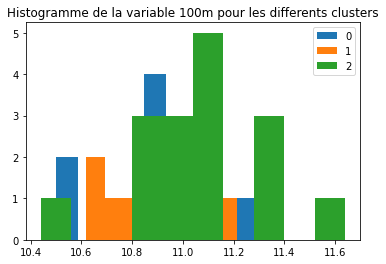

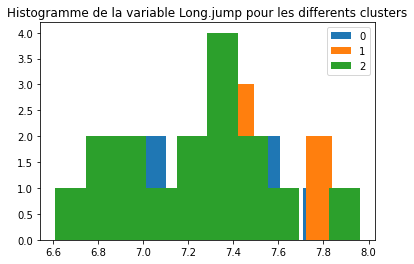

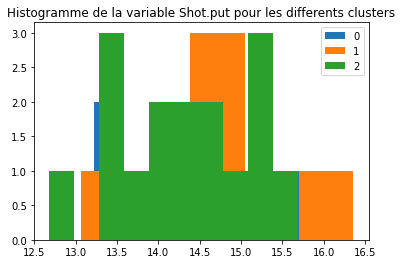

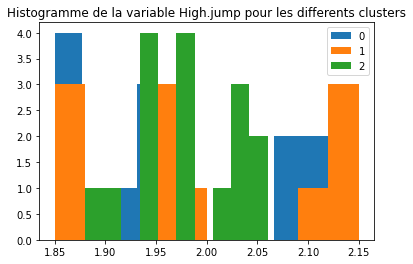

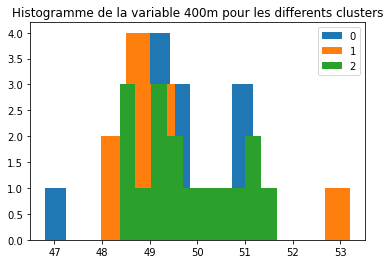

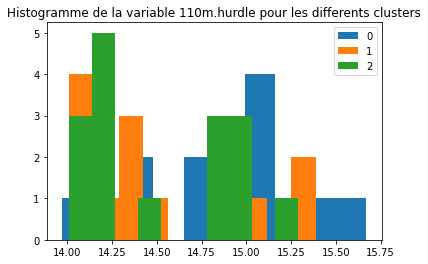

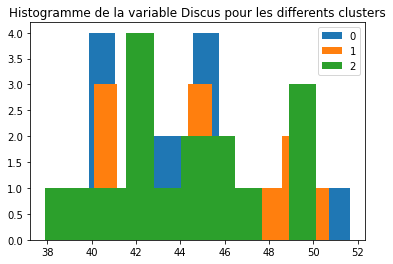

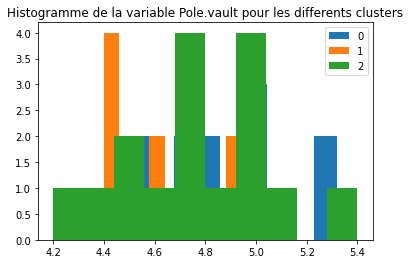

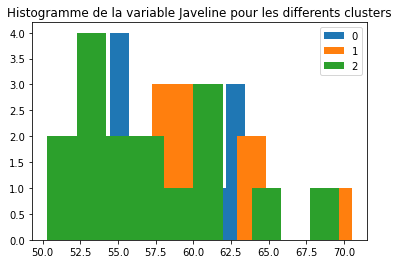

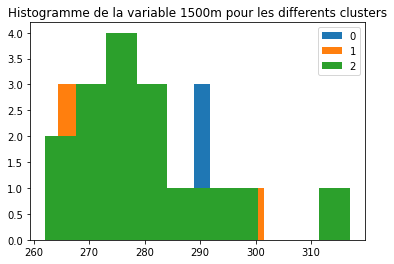

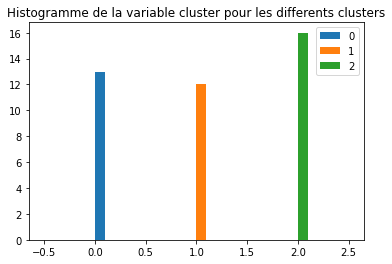

In [ ]:
for column in decathlon.columns:

  for k in range(3):
    plt.hist(decathlon[decathlon["cluster"]==k][column], label = k)
    
  plt.title(f"Histogramme de la variable {column} pour les differents clusters")
  plt.legend()
  plt.show()

Nous ne pouvons pas distinguer des distributions spécifiques à chacun des 3 groupes d'athlètes formés par nos clusters pour chaque épreuve...

Avec nos 3 clusters, il semblerait que chacun ait une spécialité sportive, les athlètes qui courent, ceux qui reussissent les épreuves de forces...

En tout cas, nous ne distinguons pas de groupes tels que les débutants, les athlètes de niveau intermédiaire et les sportifs de haut niveau, ou encore les femmes, les hommes et les enfants. Cependant, il est fort possible que les principales différences ne se reflètent que sur les moyennes des différents types d'épreuves sportives.

**END**